<a href="https://colab.research.google.com/github/Pavan-Gandham/ML-AI/blob/master/CropClassificationMLFinalYear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificaiton

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("/content/crop1.xlsx")

In [ ]:
data.head()

,Tmax,Tmin,RHI,RF,RHII,SSH,label
0,31,18,91,9,69,0,1
1,31,19,89,8,70,0,1
2,31,19,89,5,61,0,1
3,31,22,89,7,62,0,1
4,31,20,91,9,63,0,1


In [ ]:
data.dtypes

Tmax     int64
Tmin     int64
RHI      int64
RF       int64
RHII     int64
SSH      int64
label    int64
dtype: object

In [ ]:
data.size


35000

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Tmax    5000 non-null   int64
 1   Tmin    5000 non-null   int64
 2   RHI     5000 non-null   int64
 3   RF      5000 non-null   int64
 4   RHII    5000 non-null   int64
 5   SSH     5000 non-null   int64
 6   label   5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [ ]:
df['label'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
df['label'].value_counts()

1    1000
2    1000
3    1000
4    1000
5    1000
Name: label, dtype: int64

<Axes: >

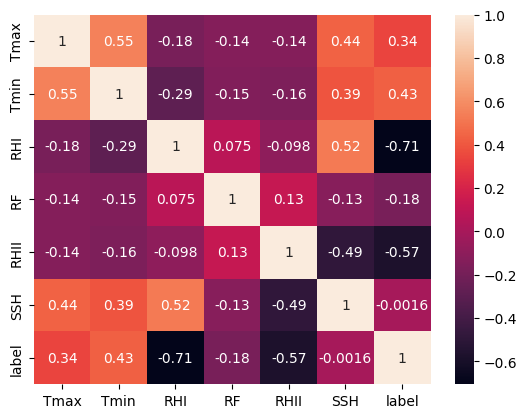

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X= df.values[:,0:6]
Y=  df.values[:,6]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 100)

In [ ]:
##Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train,y_train)
y_pred= logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97       106
           2       1.00      1.00      1.00       102
           3       0.97      0.96      0.97       105
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00        82

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
##Random Forest
randomForest = RandomForestClassifier(n_estimators = 100)
randomForest.fit(X_train,y_train)
predRandomForest_Y=randomForest.predict(X_test)
print(classification_report(y_test, predRandomForest_Y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00        82

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
##Gaussion Navie Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnbPred_Y=gnb.predict(X_test)
print(classification_report(y_test, gnbPred_Y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00        82

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
##Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dtPred_Y=dt.predict(X_test)
print(classification_report(y_test, dtPred_Y))

In [ ]:
##Gradient Boosting
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
gbmPred_Y=gbm.predict(X_test)
print(classification_report(y_test, gbmPred_Y))

In [ ]:
##SMO
smo = SVC(kernel='linear', C=1.0)
smo.fit(X_train, y_train)
smoPred_Y=smo.predict(X_test)
print(classification_report(y_test, smoPred_Y))